# Modelo de regresión simple

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


In [11]:
salarios = 'Salary.csv'
salarios = pd.read_csv(salarios) 
salarios.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [12]:
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


Pregunta a resolver: Determinar cual es el salario de un trabajador basado en el número de años de experiencia

In [13]:
salarios.skew()

YearsExperience    0.420163
Salary             0.209005
dtype: float64

In [14]:
import seaborn as sns

<Axes: xlabel='YearsExperience', ylabel='Count'>

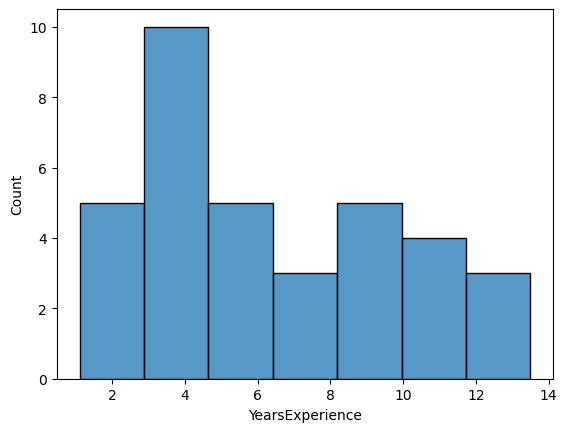

In [15]:
sns.histplot(x=salarios['YearsExperience'])


<Axes: xlabel='YearsExperience'>

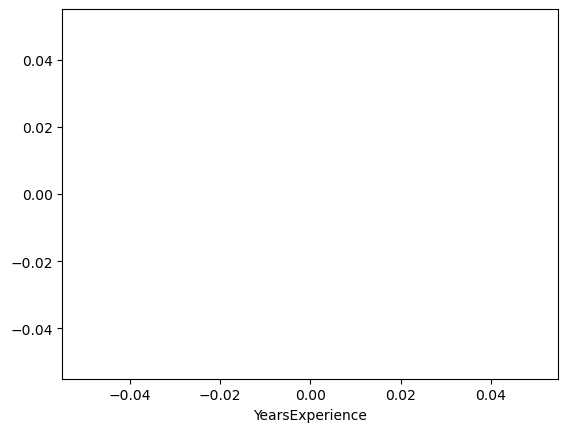

In [16]:
sns.scatterplot(x=salarios['YearsExperience'])

In [17]:
model = LinearRegression()


In [18]:
X = salarios[['YearsExperience']]
y = salarios['Salary']

In [19]:
y.shape

(35,)

In [20]:
lineal_Reg = model.fit(X,y)

In [21]:
lineal_Reg.coef_

array([8731.94104706])

In [26]:
import matplotlib.pyplot as plt

In [28]:
lineal_Reg.intercept_

np.float64(28859.52619453144)

In [29]:
y_pred = lineal_Reg.predict(X)
                            

In [30]:
y_pred_m = lineal_Reg.intercept_

In [31]:
y_pred

array([ 38464.6613463 ,  40211.04955571,  41957.43776513,  46323.40828866,
        48069.79649807,  54182.15523101,  55055.34933572,  56801.73754513,
        56801.73754513,  61167.70806866,  62914.09627808,  63787.29038278,
        63787.29038278,  64660.48448749,  68153.26090631,  71646.03732514,
        73392.42553455,  75138.81374396,  80377.9783722 ,  81251.17247691,
        88236.72531456,  90856.30762868,  97841.86046633, 100461.44278044,
       104827.41330398, 107446.99561809, 111812.96614163, 112686.16024633,
       118798.51897928, 120544.90718869, 126657.26592163, 129276.84823575,
       136262.4010734 , 141501.56570164, 146740.73032988])

In [32]:
# Para ver el score
lineal_Reg.score(X,y)

0.9651633106751443

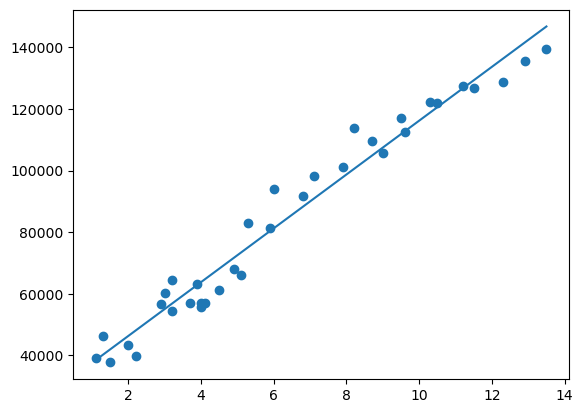

In [33]:
plt.scatter(X,y)
plt.plot(X,y_pred)
plt.show()

# Regresión Lineal Multiple

In [34]:
#10 de Julio de 2024

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pt

In [35]:
datos = pd.read_csv('advertising.csv')

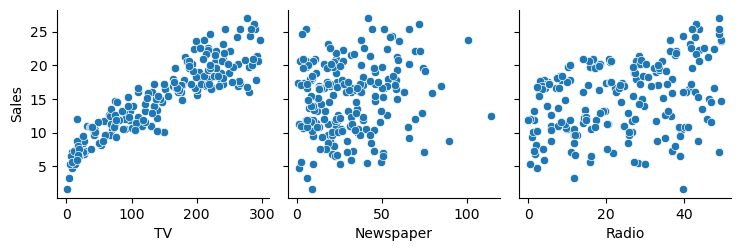

In [36]:
sns.pairplot(datos,x_vars=['TV','Newspaper','Radio'], y_vars = 'Sales')

In [37]:
datos.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

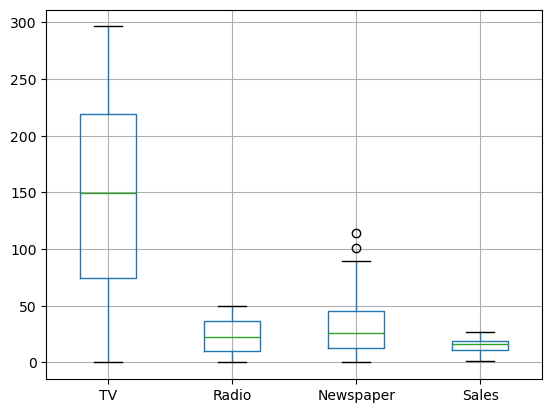

In [38]:
datos.boxplot()

In [39]:
datos.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [40]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = datos[['TV','Radio','Newspaper']]
X = add_constant(X)

VIF_data = pd.DataFrame()
VIF_data['Variable'] = X.columns
VIF_data['VIF'] = [variance_inflation_factor(X.values,i)for i in range (X.shape[1])]
VIF_data


,Variable,VIF
0,const,6.848900
1,TV,1.004611
2,Radio,1.144952
3,Newspaper,1.145187


In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [43]:
X = datos[['TV','Radio','Newspaper']]
y = datos['Sales']

In [44]:
model.fit(X,y)

LinearRegression()

In [45]:
model.intercept_

np.float64(4.625124078808652)

In [46]:
model.coef_

array([0.05444578, 0.10700123, 0.00033566])

In [47]:
sales_pred = model.predict(X)


In [48]:
import matplotlib.pyplot as plt

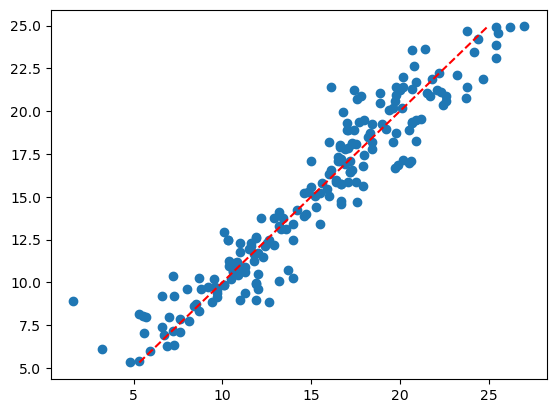

In [49]:
plt.scatter(datos['Sales'],sales_pred)
plt.plot([sales_pred.min(),sales_pred.max()],[sales_pred.min(), sales_pred.max()],'--r')

In [50]:
model.score(X,y)

0.9025912899684558

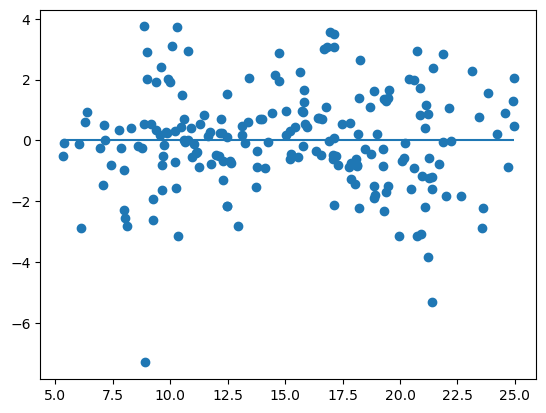

In [51]:
residuos = y-sales_pred
plt.scatter(sales_pred,residuos)
plt.hlines(y=0, xmin=sales_pred.min(),xmax=sales_pred.max())

In [52]:
import statsmodels.api as sm 
from statsmodels.tools.tools import add_constant

In [53]:
X_2 = datos[['TV','Radio','Newspaper']]
X_2 = add_constant(X_2)
y_2 = datos['Sales']


In [54]:
X_2

,const,TV,Radio,Newspaper
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1
2,1.0,17.2,45.9,69.3
3,1.0,151.5,41.3,58.5
4,1.0,180.8,10.8,58.4
...,...,...,...,...
195,1.0,38.2,3.7,13.8
196,1.0,94.2,4.9,8.1
197,1.0,177.0,9.3,6.4
198,1.0,283.6,42.0,66.2


In [55]:
model_2 = sm.OLS(y_2,X_2).fit()
model_2.params

const        4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64

In [56]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           8.13e-99
Time:                        14:06:11   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regresión con PCR

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



In [58]:
datos = pd.read_csv('advertising.csv')
datos.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [59]:
modelo = Pipeline([
    ('scarler',StandardScaler()),
    ('pca',PCA()),
    ('regresion',LinearRegression())
])

In [60]:
X = datos [['TV','Radio','Newspaper']]
y = datos['Sales']

In [61]:
modelo.fit(X,y)

Pipeline(steps=[('scarler', StandardScaler()), ('pca', PCA()),
                ('regresion', LinearRegression())])

In [62]:
modelo.predict(X)

array([21.22097209, 11.26824775, 10.49620897, 17.31244651, 15.64413685,
       10.35633677, 11.2732847 , 13.27062458,  5.31839603, 15.78871013,
        8.8527202 , 18.88400523,  9.69879662, 10.74921373, 19.27328852,
       20.38554445, 12.27105794, 24.20214502, 10.5924398 , 15.20872794,
       19.49794066, 18.10414656,  7.06177654, 18.87221072,  9.37145421,
       19.31996936, 15.54479137, 19.49216302, 21.07865408, 10.19471067,
       23.61492832, 12.64683045, 10.08782551, 21.2260486 ,  9.98787085,
       20.89407055, 23.84503494, 13.99342411,  9.8404516 , 21.08344935,
       18.04712878, 17.84885818, 23.57494339, 16.79762772,  8.75617872,
       16.57668108, 10.58020572, 22.13342743, 18.70257411,  9.53181337,
       15.84670856, 11.11990058, 20.88243422, 19.53008343, 22.01500291,
       20.76038994,  8.04320903, 14.10063486, 21.4222098 , 19.25650785,
        7.75915886, 23.43911942, 19.32168181, 13.3867616 , 16.35231896,
        9.37729644,  8.97313482, 13.7643628 , 20.49677834, 21.13

In [63]:
regresor = modelo.named_steps['regresion']

In [64]:
regresor.intercept_

np.float64(15.130500000000001)

In [65]:
regresor.coef_

array([ 2.06992121,  4.32260897, -1.13244033])

In [66]:
pca = modelo.named_steps['pca']
pca.components_

array([[ 0.20787391,  0.69139674,  0.69192412],
       [ 0.97814838, -0.14965532, -0.14432267],
       [-0.0037659 , -0.70680537,  0.70739804]])

In [67]:
from sklearn.metrics import r2_score 

score = r2_score(y,modelo.predict(X))

In [68]:
score

0.9025912899684558

In [69]:
X.shape

(200, 3)

# Modelos no lineales

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
datos = pd.read_csv("ExpansiónCobre.csv")
datos.head()

,Expansión,Kelvin
0,0.591,24.41
1,1.547,34.82
2,2.902,44.09
3,2.894,45.07
4,4.703,54.98


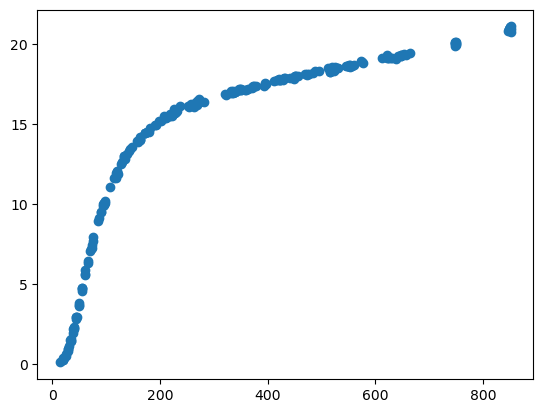

In [73]:
plt.scatter(datos['Kelvin'],datos['Expansión'])

In [74]:
def logistica(t,a,m,n,tau):
    return a*(1+m*np.exp(-t/tau))/(1+n*np.exp(-t/tau))

In [75]:
def polinomio(x, a, b, c, d, e, f ):
    return a + b * x + c * x**2 + d * c**3 + e * x**4

In [76]:
X = datos['Kelvin'].values
y = datos['Expansión'].values

In [77]:
from scipy.optimize import curve_fit #Libreria necesaria

In [78]:
params, params_cov = curve_fit(polinomio,X,y) 

C:\Users\usuario\AppData\Local\Temp\ipykernel_14528\2054448895.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  params, params_cov = curve_fit(polinomio,X,y)


In [79]:
y_pred = polinomio(X,*params)

In [80]:
from sklearn.metrics import r2_score, mean_squared_error

In [81]:
r2_score(y,y_pred)

0.9564762652466666

In [82]:
mean_squared_error(y,y_pred)

np.float64(1.4422344391405182)

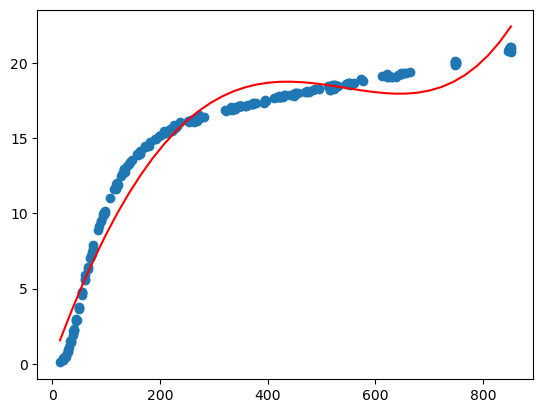

In [83]:
kelvin = np.linspace(X.min(),X.max(),40)
plt.scatter(X,y)
plt.plot(kelvin,polinomio(kelvin,*params),color='r')

# División dataset

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv('ExpansiónCobre.csv')
X = df['Kelvin'].values.reshape(-1, 1)
y = df['Expansión'].values

In [86]:
X.shape

(236, 1)

In [87]:
%pip install kennard-stone

Note: you may need to restart the kernel to use updated packages.


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=45)


In [89]:
X_train.shape

(188, 1)

In [94]:
%pip install kennard-stone

Note: you may need to restart the kernel to use updated packages.


In [95]:
# From sklearn.model_selection import train_test_split
from kennard_stone import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Calculating pairwise distances using scikit-learn.
Calculating pairwise distances using scikit-learn.


In [96]:
def polinomio (x, a, b, c, d, e, f):
    return a + b * x + c * x**2 + d * x**3 + e* x**4 + f * x**5

In [99]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error

params, params_cov= curve_fit(polinomio,X_train.flatten(),y_train)

y_pred_train = polinomio(X_train,*params)
y_pred_test = polinomio(X_test,*params)


In [100]:
mean_squared_error(y_train,y_pred_train)


np.float64(0.07637715605457747)

In [101]:
mean_squared_error(y_test,y_pred_test)

np.float64(0.09306621696639844)